In [1]:
%matplotlib inline

In [2]:
# Using KMeans to find outliers in a cluster of points.
# Finding outliers means finding the centroids and then looking
# for elements by their distance from the centroids

In [9]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, label = make_blobs(100, centers = 1)

In [10]:
import numpy as np

In [11]:
# a cluster with one center is similar to an SVM with one class.

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=1)

In [14]:
kmeans.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=1, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

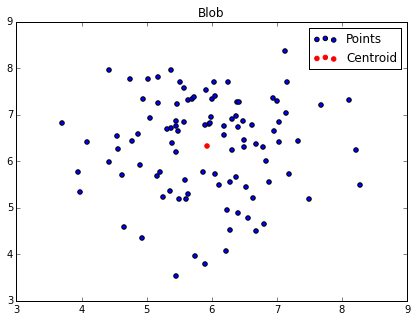

In [17]:
# looking at the plot
f, ax = plt.subplots(figsize=(7,5))
ax.set_title('Blob')
ax.scatter(X[:, 0], X[:, 1], label='Points')
ax.scatter(kmeans.cluster_centers_[:, 0],
           kmeans.cluster_centers_[:, 1], label='Centroid',
           color='r')
ax.legend(loc='best')

In [20]:
# identify the 5 closest points
distances = kmeans.transform(X)

In [21]:
# argsort returns an array of indexes which will sort the array
# in ascending order. Reverse it with [::-1]
sorted_idx = np.argsort(distances.ravel())[::-1][:5]

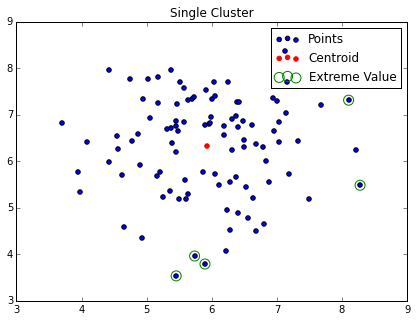

In [22]:
f, ax = plt.subplots(figsize=(7,5))
ax.set_title('Single Cluster')
ax.scatter(X[:, 0], X[:, 1], label='Points')
ax.scatter(kmeans.cluster_centers_[:, 0],
           kmeans.cluster_centers_[:, 1],
           label='Centroid', color='r')
ax.scatter(X[sorted_idx][:, 0],
           X[sorted_idx][:, 1],
           label='Extreme Value', edgecolors='g',
           facecolors='none', s=100)
ax.legend(loc='best')

In [23]:
# simulating removing these outliers
new_X = np.delete(X, sorted_idx, axis=0)

In [24]:
# this causes the centroids to move slightly
new_kmeans = KMeans(n_clusters=1)
new_kmeans.fit(new_X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=1, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

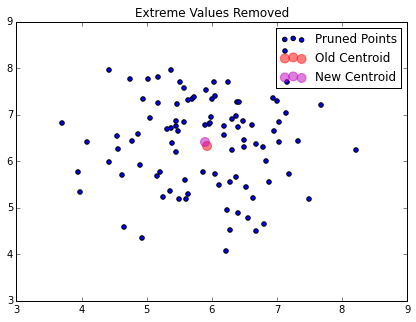

In [26]:
f, ax = plt.subplots(figsize=(7,5))
ax.set_title("Extreme Values Removed")
ax.scatter(new_X[:, 0], new_X[:, 1], label='Pruned Points')
ax.scatter(kmeans.cluster_centers_[:, 0],
           kmeans.cluster_centers_[:, 1],
           label='Old Centroid',
           color='r', s=80, alpha=.5)
ax.scatter(new_kmeans.cluster_centers_[:, 0],
           new_kmeans.cluster_centers_[:, 1],
           label='New Centroid',
           color='m', s=80, alpha=.5)
ax.legend(loc='best')

In [27]:
# There is a fundamental connection between Gaussian distribution
# and the KMeans clustering. Let's create an empirical Gaussian
# based off the centroid and sample covariance matrix and look
# at the probability of each point that we removed.
# this will show that the points we removed were the least likely
# to occur.

In [28]:
from scipy import stats
emp_dist = stats.multivariate_normal(kmeans.cluster_centers_.ravel())
lowest_prob_idx = np.argsort(emp_dist.pdf(X))[:5]
np.all(X[sorted_idx] == X[lowest_prob_idx])

True

In [31]:
print kmeans.cluster_centers_
print kmeans.cluster_centers_.ravel()

[[ 5.92830283  6.32759144]]
[ 5.92830283  6.32759144]


In [32]:
help(stats.multivariate_normal)

Help on multivariate_normal_gen in module scipy.stats._multivariate object:

class multivariate_normal_gen(__builtin__.object)
 |  A multivariate normal random variable.
 |  
 |  The `mean` keyword specifies the mean. The `cov` keyword specifies the
 |  covariance matrix.
 |  
 |  Methods
 |  -------
 |  pdf(x, mean=None, cov=1, allow_singular=False)
 |      Probability density function.
 |  logpdf(x, mean=None, cov=1, allow_singular=False)
 |      Log of the probability density function.
 |  rvs(mean=None, cov=1, allow_singular=False, size=1)
 |      Draw random samples from a multivariate normal distribution.
 |  entropy()
 |      Compute the differential entropy of the multivariate normal.
 |  
 |  Parameters
 |  ----------
 |  x : array_like
 |      Quantiles, with the last axis of `x` denoting the components.
 |  %(_doc_default_callparams)s
 |  
 |  Alternatively, the object may be called (as a function) to fix the mean
 |  and covariance parameters, returning a "frozen" multivari